<a href="https://colab.research.google.com/github/minalmmm/USA-House-Price-Prediction-Using-linear-Regression-model/blob/main/project_3_raw_file_work_in_progress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis (EDA) for Real Estate Pricing: Unveiling the Dynamics of House Valuation in a Dynamic Market**

# **Problem Statement:**
In the dynamic landscape of the residential real estate market, determining an optimal and competitive price for a house is a multifaceted challenge. As a key member of the analytics team in a leading real estate company, your task is to conduct a comprehensive analysis to identify and understand the myriad variables that significantly influence house prices. By leveraging advanced data analytics techniques and visualization tools, your goal is to uncover patterns, correlations, and trends within the dataset, enabling the company to make informed decisions and strategically position properties for better business opportunities.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**1. Loading the Data**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/assignment2/housing_data.csv")

In [ ]:
df

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,SC60,RL,62,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Aug,2007,WD,Normal,175000
1456,1456,SC20,RL,85,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,No,MnPrv,No,0,Feb,2010,WD,Normal,210000
1457,1457,SC70,RL,66,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,No,GdPrv,Shed,2500,May,2010,WD,Normal,266500
1458,1458,SC20,RL,68,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Apr,2010,WD,Normal,142125


**Use the shape parameter to get the shape of the dataset.**

In [ ]:
print("shape of the data is " ,df.shape)

shape of the data is  (1460, 81)


In [ ]:
df.columns

Index(['Unnamed: 0', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Pa

In [ ]:
num_col=df.select_dtypes(include=['int','float']).columns

In [ ]:
values=pd.DataFrame(num_col)
values.T

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,Unnamed: 0,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice


In [ ]:
df.select_dtypes(include=['object']).columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition'],
      dtype='object')

**The information about the data type of the data set.**

In [ ]:
# Getting the informaatin of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   int64  
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Display the first five rows of the data set.**

In [ ]:
df.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


## **i) Descriptive Statistics**

Summary Statistics
- **Measure of central Tendancy**
- **Mean**: Mean is the average of all values
- **mode**: Median is the middle value when data is sorted.
-**Median** : Mode is the most frequently occurring value in the dataset.
-**Describe()** is used to view some basic statistical details like percentile, mean, std, etc. of a data frame or a series of numeric values.


In [ ]:
# Getting the summary statistics of the data
df.describe()

,Unnamed: 0,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,729.500000,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,2007.815753,180921.195890
std,421.610009,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,1.328095,79442.502883
min,0.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,364.750000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129975.000000
50%,729.500000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,163000.000000
75%,1094.250000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,214000.000000
max,1459.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,2010.000000,755000.000000


 -**Measure of dispersion**: Measures of Dispersion are used to represent the scattering of data. These are the numbers that show the various aspects of the data spread across various parameters.
 - **Range**: It is defined as the difference between the largest and the smallest value in the distribution.
 -**Starndard deviation**: It is the square root of the arithmetic average of the square of the deviations measured from the mean.
 -**percentiles**:  How many of the values are less than the given percentile


In [ ]:
df['SalePrice'].min()

34900

In [ ]:
df['SalePrice'].max()

755000

In [ ]:
df.describe(include=[object])

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition
count,1460,1460,1460,91,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,15,5,2,2,4,4,2,5,3,25,...,4,6,6,3,4,5,5,12,9,6
top,SC20,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Unf,TA,TA,Y,No,No,No,Jun,WD,Normal
freq,536,1151,1454,50,925,1311,1459,1052,1382,225,...,605,1311,1326,1340,1453,1179,1406,253,1267,1198


In [ ]:
stat_num=df.describe(include=['int','float'])

**Percentile**

In [ ]:
#calculate no percentiles for each numeric variable
df.describe(percentiles=[])

,Unnamed: 0,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,729.500000,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,2007.815753,180921.195890
std,421.610009,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,1.328095,79442.502883
min,0.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
50%,729.500000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,163000.000000
max,1459.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,2010.000000,755000.000000


In [ ]:
print(df.SalePrice.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
85%      250000.000000
90%      278000.000000
100%     755000.000000
max      755000.000000
Name: SalePrice, dtype: float64


**Range**

In [ ]:
#calculate range for each numeric variable
range_num_data= stat_num.max()-stat_num.min()

In [ ]:
range_num_data

Unnamed: 0         1460.000000
LotFrontage        1460.000000
LotArea          213945.000000
OverallQual        1459.000000
OverallCond        1459.000000
YearBuilt          1979.797096
YearRemodAdd       1989.354593
MasVnrArea         1600.000000
BsmtFinSF1         5644.000000
BsmtFinSF2         1474.000000
BsmtUnfSF          2336.000000
TotalBsmtSF        6110.000000
1stFlrSF           4358.000000
2ndFlrSF           2065.000000
LowQualFinSF       1460.000000
GrLivArea          5308.000000
BsmtFullBath       1460.000000
BsmtHalfBath       1460.000000
FullBath           1460.000000
HalfBath           1460.000000
BedroomAbvGr       1460.000000
KitchenAbvGr       1460.000000
TotRmsAbvGrd       1458.374607
Fireplaces         1460.000000
GarageYrBlt        1985.310275
GarageCars         1460.000000
GarageArea         1460.000000
WoodDeckSF         1460.000000
OpenPorchSF        1460.000000
EnclosedPorch      1460.000000
3SsnPorch          1460.000000
ScreenPorch        1460.000000
PoolArea

**Standard Deviation**

In [ ]:
stat_num.std()

Unnamed: 0          525.972191
LotFrontage         495.856777
LotArea           73587.370965
OverallQual         514.353644
OverallCond         514.543568
YearBuilt           682.491640
YearRemodAdd        693.050776
MasVnrArea          678.604729
BsmtFinSF1         1878.276762
BsmtFinSF2          665.319415
BsmtUnfSF           760.957911
TotalBsmtSF        1913.048589
1stFlrSF           1384.720924
2ndFlrSF            762.135346
LowQualFinSF        523.315526
GrLivArea          1658.566019
BsmtFullBath        515.939191
BsmtHalfBath        516.072428
FullBath            515.677866
HalfBath            515.992138
BedroomAbvGr        515.199330
KitchenAbvGr        515.821691
TotRmsAbvGrd        514.073487
Fireplaces          515.872748
GarageYrBlt         691.216417
GarageCars          515.607733
GarageArea          536.717113
WoodDeckSF          535.125950
OpenPorchSF         511.370738
EnclosedPorch       519.870181
3SsnPorch           519.638831
ScreenPorch         515.462608
PoolArea

**check for datatypes**

In [ ]:
df.dtypes

Unnamed: 0        int64
MSSubClass       object
MSZoning         object
LotFrontage       int64
LotArea           int64
                  ...  
MoSold           object
YrSold            int64
SaleType         object
SaleCondition    object
SalePrice         int64
Length: 81, dtype: object

**Data Distribution**
- **Histrogram**: Histograms helps visualizing and comprehending the data distribution.
-**Boxplot**
-**Probability Density Plots**

In [ ]:
df.dtypes


Unnamed: 0        int64
MSSubClass       object
MSZoning         object
LotFrontage       int64
LotArea           int64
                  ...  
MoSold           object
YrSold            int64
SaleType         object
SaleCondition    object
SalePrice         int64
Length: 81, dtype: object

**Histrogram**

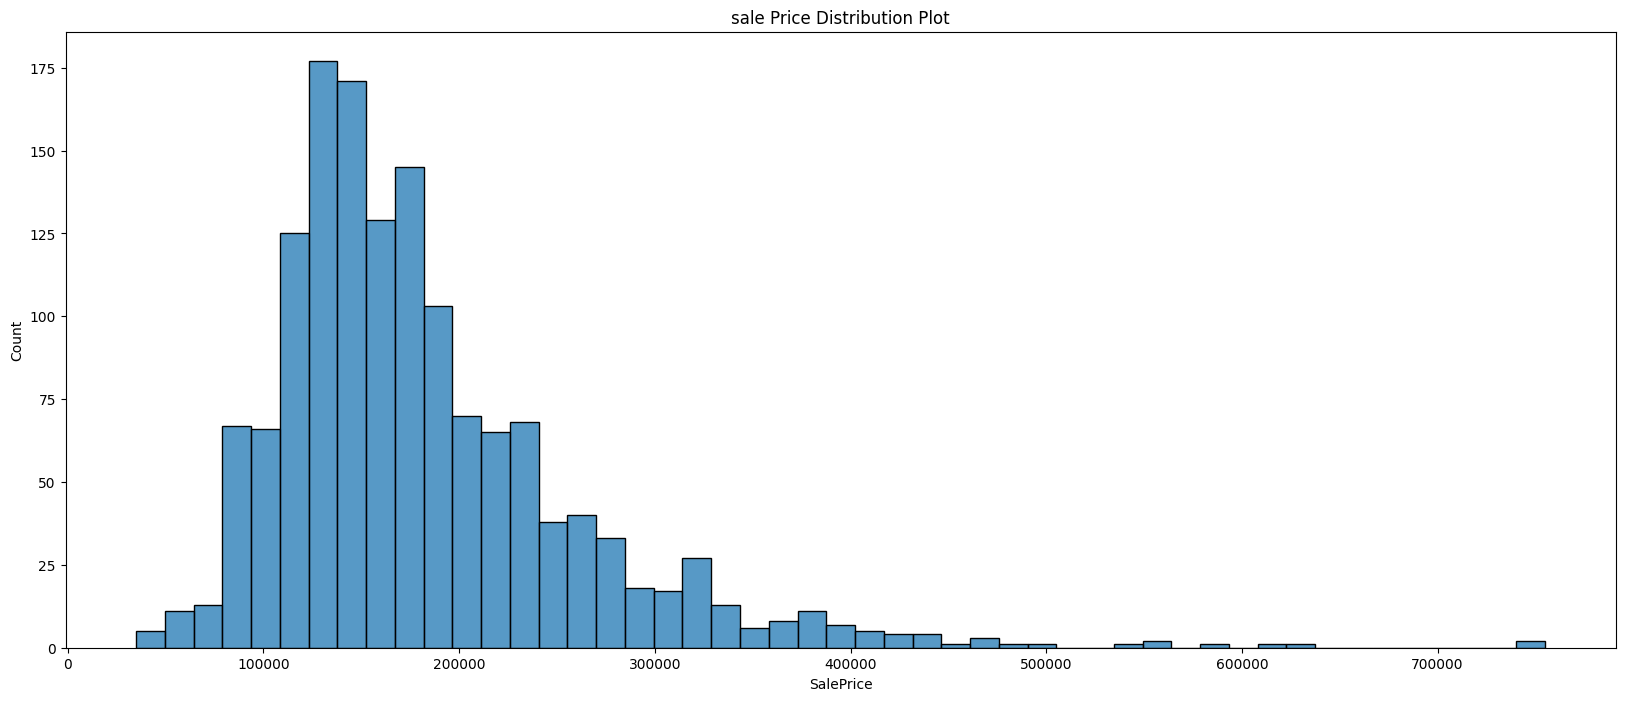

In [ ]:
plt.figure(figsize=(20,8))
plt.title('sale Price Distribution Plot')
sns.histplot(df.SalePrice,kde=False)
plt.show()

**Boxplot**

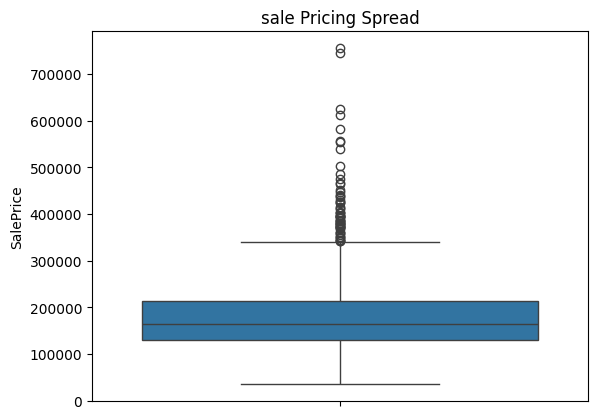

In [ ]:
sns.boxplot(df.SalePrice)
plt.title('sale Pricing Spread')

plt.show()

 **Probability Density Plots**

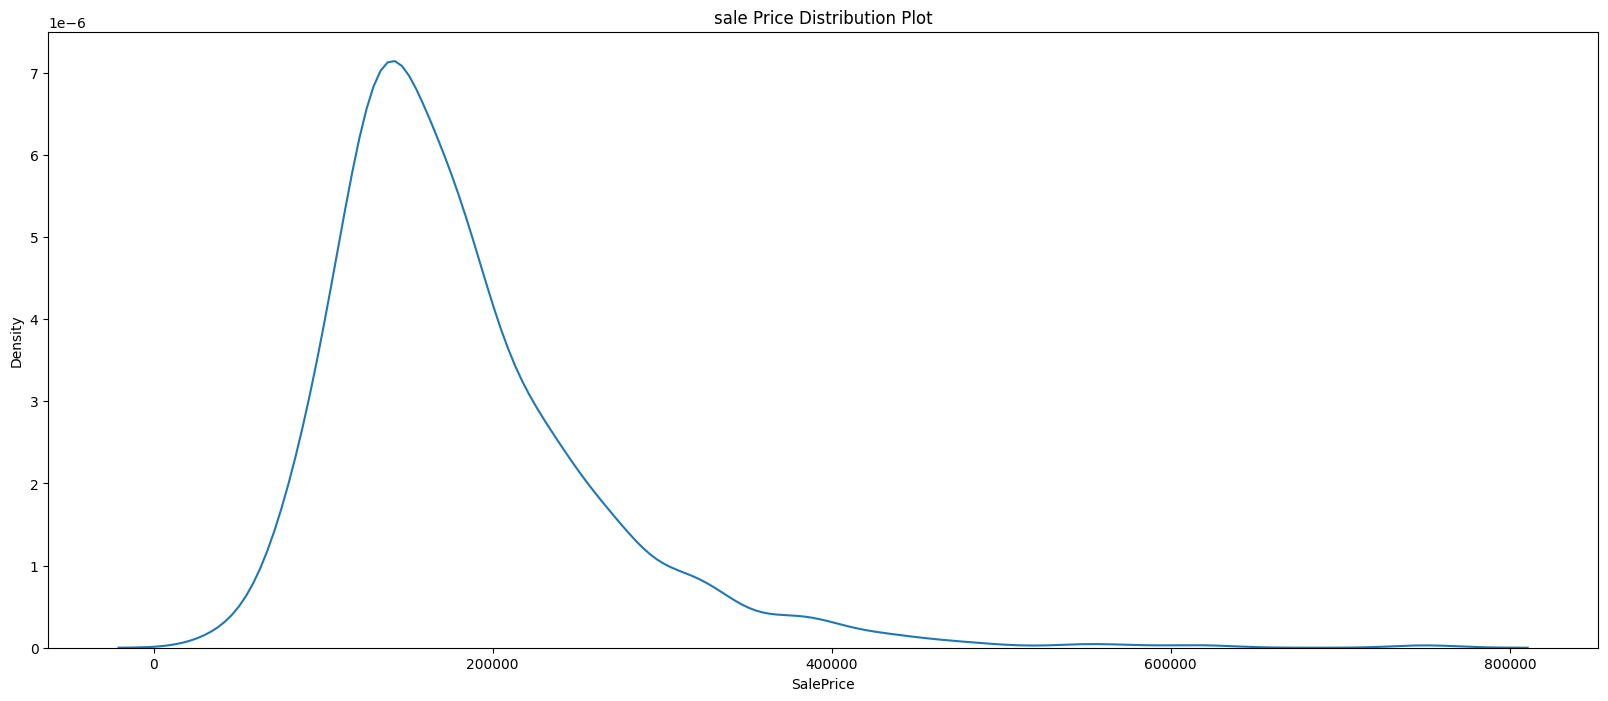

In [ ]:
plt.figure(figsize=(20,8))
plt.title('sale Price Distribution Plot')
sns.kdeplot(df.SalePrice)
plt.show()

# **2. Data Visualization**

### **a. Univariate Analysis**: In Univariate analysis, plotting the right charts can help us better understand the data, which is why data visualization is so important. Matplotlib and Seaborn libraries are used in this post to visualize our data.

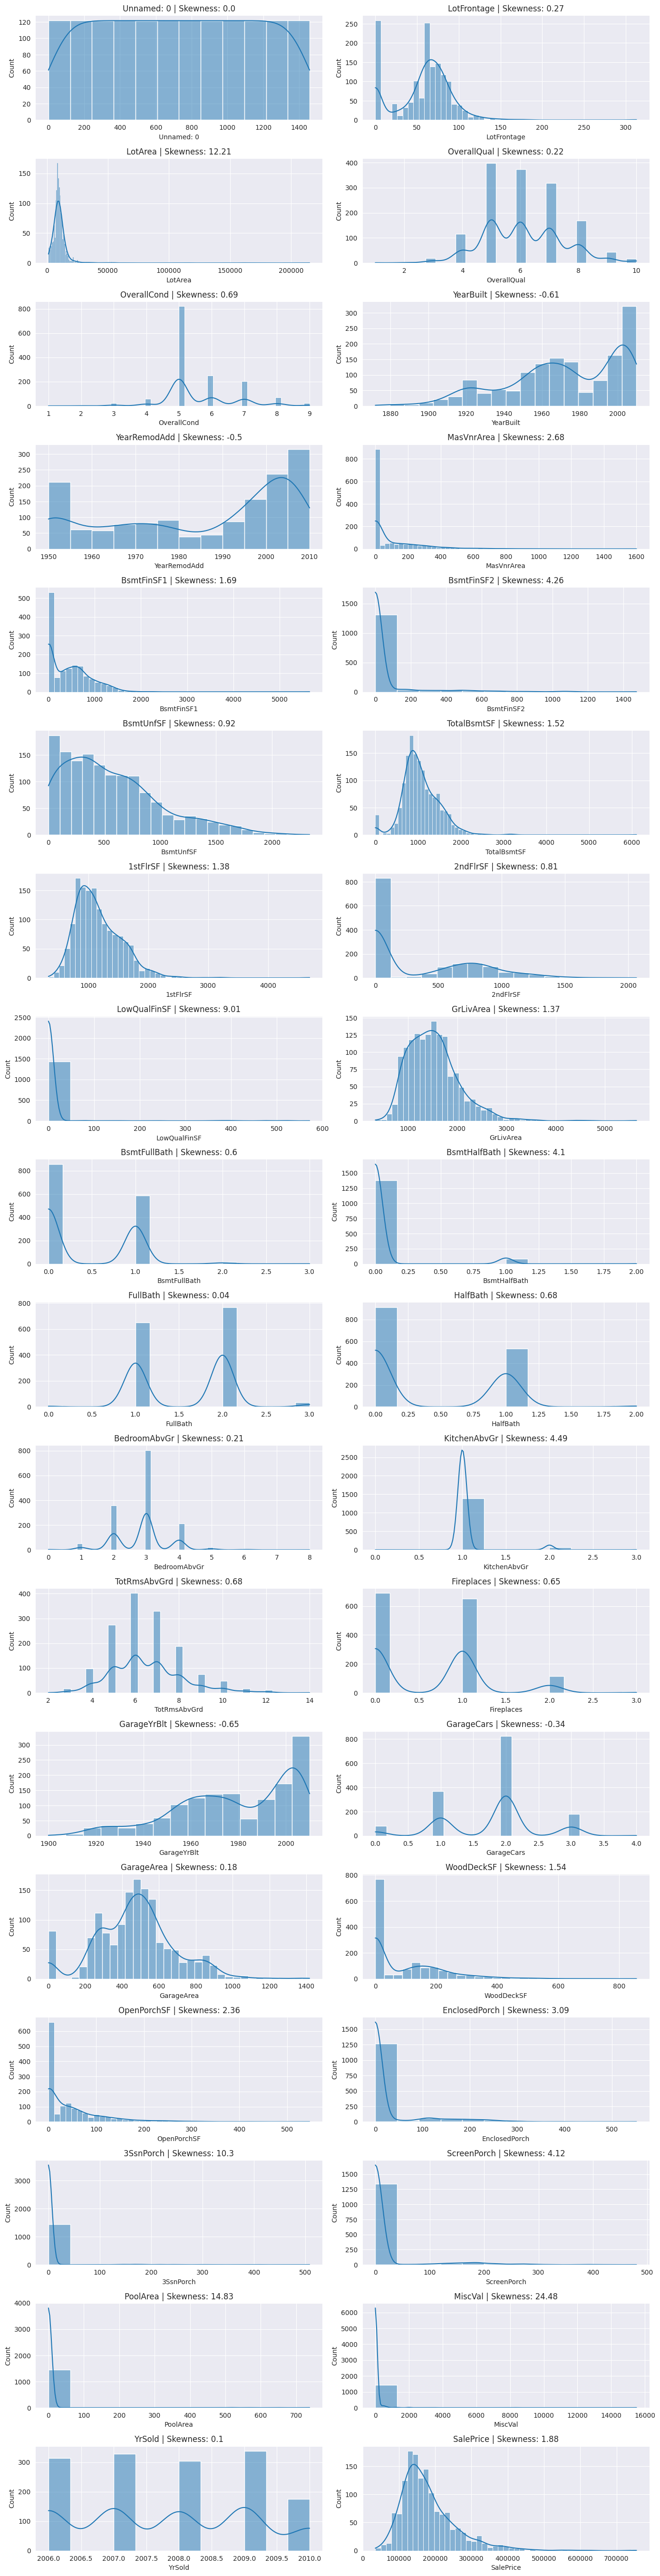

In [ ]:
# Set Seaborn style
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

### **b. Bivariate Analysis**- Bivariate analysis allows for a thorough comprehension of the interdependence between two variables within a dataset by revealing information on the type and intensity of associations.

**Scatter plot**- Scatterplots are a fundamental graph type—much less complicated than histograms and boxplots.
- Identifying the relationship of 2 variables so we can understand the trends, patterns, and correlation


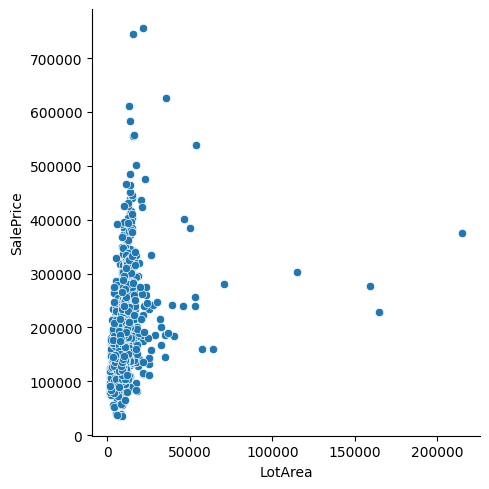

In [ ]:
sns.relplot(df, x="LotArea", y="SalePrice")

**coefficient of correlation**

In [ ]:
from scipy import stats
stats.pearsonr(df["SalePrice"], df["LotArea"])

PearsonRResult(statistic=0.26384335387140573, pvalue=1.1231391549186823e-24)

**Adding a best fit line**

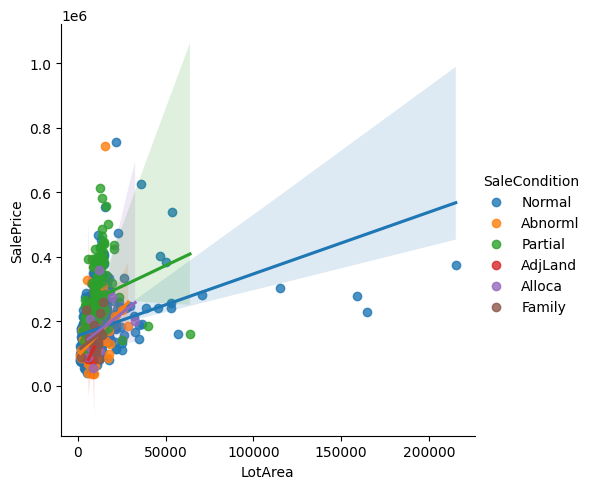

In [ ]:
sns.lmplot( x="LotArea", y="SalePrice",hue="SaleCondition", data=df)

**Pairplot**-To plot multiple pairwise bivariate distributions in a dataset, you can use the .pairplot() function.


- **c. Multivariate analysis**- Bivariate analysis allows for a thorough comprehension of the interdependence between two variables.

In [ ]:
# Set the color palette
#sns.set_palette("Pastel1")



# Using Seaborn to create a pair plot with the specified color palette
#sns.pairplot(df)

#plt.subtitle('Pair Plot for DataFrame')
#plt.show()

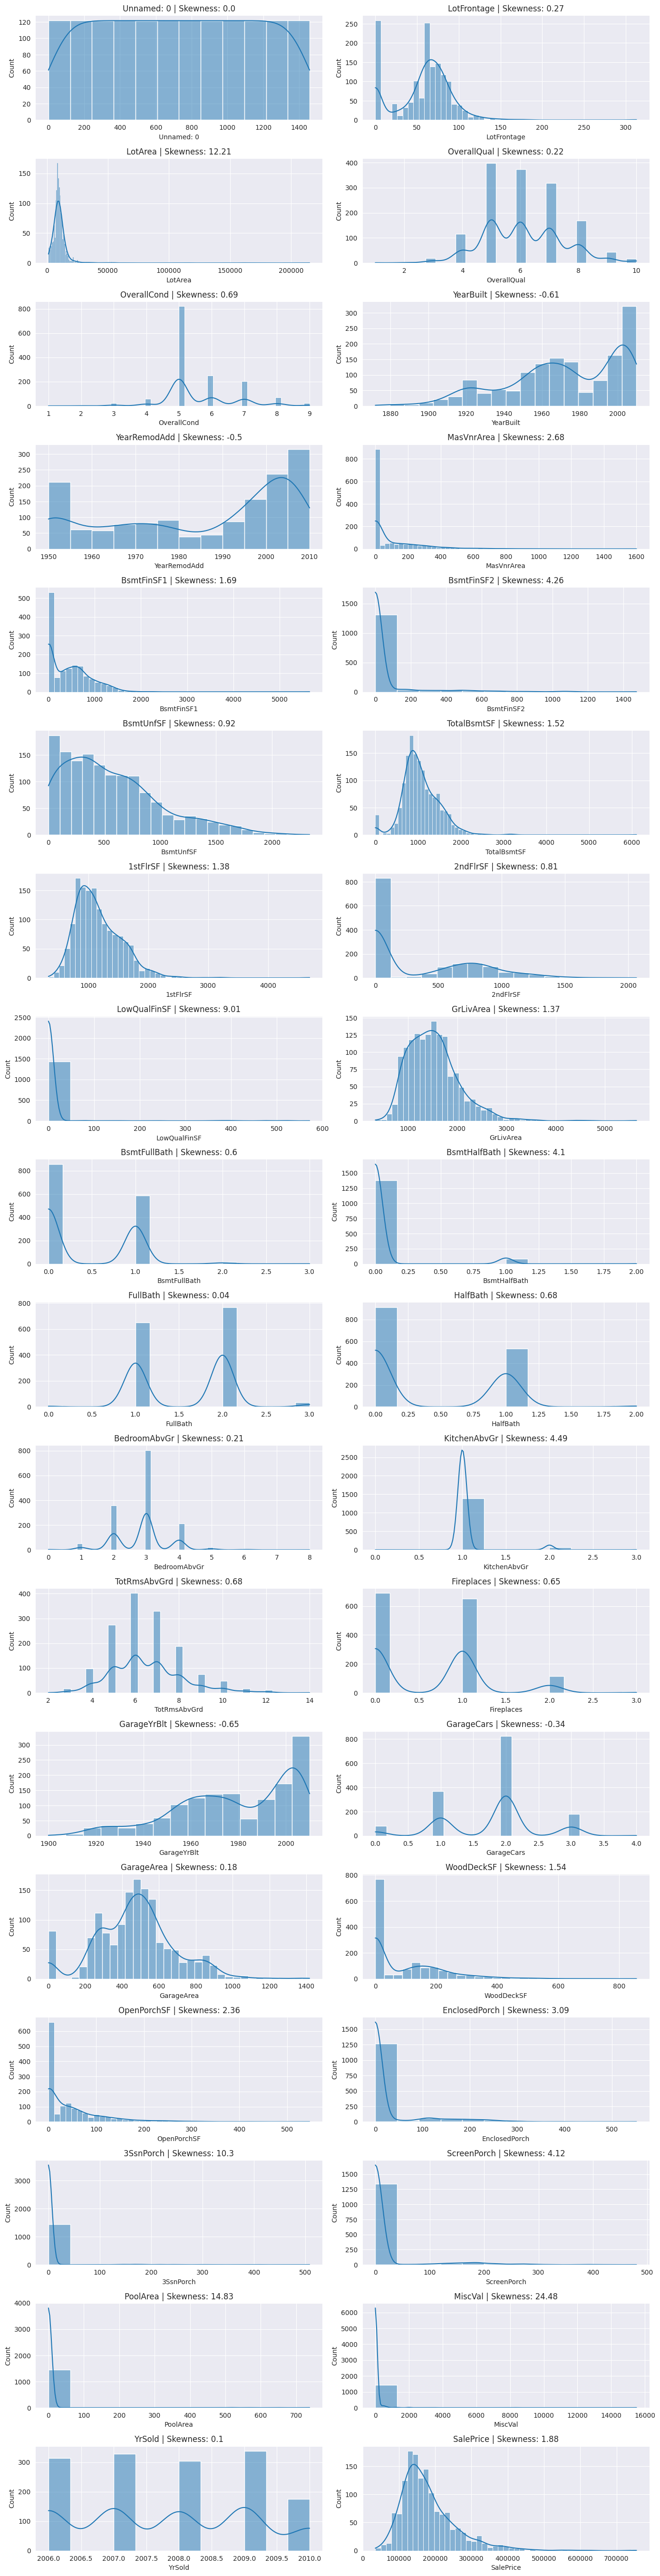

# **2. Cleaning the Data:**


**Check for Duplicated Values**

In [ ]:
df.duplicated().sum()

0

 **Over all null values**

In [ ]:
df.isnull().sum().sum()

2323

 **No null values**

In [ ]:
df.notnull().sum()

Unnamed: 0       1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1460
LotArea          1460
                 ... 
MoSold           1460
YrSold           1460
SaleType         1460
SaleCondition    1460
SalePrice        1460
Length: 81, dtype: int64

In [ ]:
df.isnull().sum().sort_values(ascending = False)

Alley           1369
MasVnrType       872
GarageYrBlt       81
Electrical         1
KitchenAbvGr       0
                ... 
ExterQual          0
MasVnrArea         0
Exterior2nd        0
Exterior1st        0
SalePrice          0
Length: 81, dtype: int64

**Check for Missing Values**

In [ ]:
df.isnull().sum()

Unnamed: 0       0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [ ]:
df['Alley'].value_counts(dropna=False)

Alley
NaN     1369
Grvl      50
Pave      41
Name: count, dtype: int64

In [ ]:
df.isnull().any().any()

True

In [ ]:
df['Alley'].isnull().sum()

1369

In [ ]:
df['Electrical'].isnull().sum()

1

In [ ]:
df['GarageYrBlt'].isnull().sum()

81

**Check whether there are null values in columns**

In [ ]:
# Check whether there are null values in columns
null_columns = df.columns[df.isnull().any()]
print(df[null_columns].isnull().sum())

Alley          1369
MasVnrType      872
Electrical        1
GarageYrBlt      81
dtype: int64


**work on central tendency**

In [ ]:
df.columns

Index(['Unnamed: 0', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Pa

In [ ]:
df['Electrical'] = pd.to_numeric(df['Electrical'], errors='coerce')
el_mean=df['Electrical'].mean()

In [ ]:
df['GarageYrBlt'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: GarageYrBlt
Non-Null Count  Dtype  
--------------  -----  
1379 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


In [ ]:
g_mean=df['GarageYrBlt'].mean()

In [ ]:
df['Electrical'].fillna('NA',inplace= True)##i want permanent change thats why I passed inplace

In [ ]:
df['GarageYrBlt'].fillna(g_mean,inplace= True)##i want permanent change thats why I passed inplace

In [ ]:
df.isnull().sum().sum()

2241

In [ ]:
null_columns = df.columns[df.isnull().any()]
print(df[null_columns].isnull().sum())

Alley         1369
MasVnrType     872
dtype: int64


In [ ]:
columns_with_miss = df.isna().sum()
#filtering only the columns with at least 1 missing value
columns_with_miss = columns_with_miss[columns_with_miss!=0]
#The number of columns with missing values
print('Columns with missing values:', len(columns_with_miss))
#sorting the columns by the number of missing values descending
columns_with_miss.sort_values(ascending=False)

Columns with missing values: 2


Alley         1369
MasVnrType     872
dtype: int64

# **Outliers**

In [ ]:
# Get only numerical columns
numerical_columns = list(df.dtypes[df.dtypes == 'int64'].index)
len(numerical_columns)

35

In [ ]:
#  Create the plot grid
rows = 6
columns = 6

fig, axes = plt.subplots(rows,columns, figsize=(30,30))

x, y = 0, 0

for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df[column], ax=axes[x, y])

    if y < columns-1:
        y += 1
    elif y == columns-1:
        x += 1
        y = 0
    else:
        y += 1

        plt.show()

NameError: name 'plt' is not defined

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df.boxplot(numerical_columns)

In [ ]:
!pip install statistics

In [ ]:
import statistics

In [ ]:
# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(df):
    #define a list to accumlate anomalies
    anomalies = []

    # Set upper and lower limit to 3 standard deviation
    random_data_std = statistics.stdev(df)
    random_data_mean = statistics.mean(df)
    # 3-standard deviation

    anomaly_cut_off = random_data_std * 3

    lower_limit  = random_data_mean - anomaly_cut_off
    upper_limit = random_data_mean + anomaly_cut_off

    # Generate outliers
    for outlier in df:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

In [ ]:
list_1 = find_anomalies